In [1]:
from converter import PowerElectronicInverter,SwitchingSignals
from scipy.integrate import odeint,ode
import numpy as np
import matplotlib.pyplot as plt

In [2]:
switching1 = SwitchingSignals(100,100)

In [3]:
switching1.show_waveforms()

fswitch:1000.00,Tswitch:0.00100
fmodulating:1000.00,Tmodulating:0.00100
ma:1.000,mf:1.000
Time step:0.00010


In [4]:
inverter1 = PowerElectronicInverter(Vdc=100,signals=switching1)

In [5]:
inverter1.signal_type,inverter1.signals

('square', <converter.SwitchingSignals at 0x1891f4e4e10>)

Number of timsteps:100


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:250: ODEintWarning: Integration successful.
  warnings.warn(warning_msg, ODEintWarning)


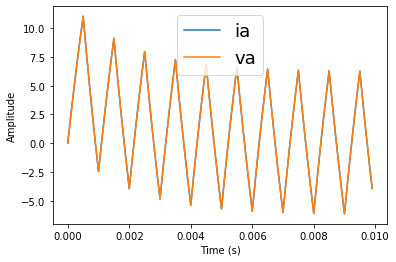

Inverter states:[-5.888904845258961, 0.0]


In [6]:
sol = inverter1.simulate_inverter(tf=0.01)
inverter1.show_states()

In [7]:
from scipy import signal
from scipy.fftpack import fft
import matplotlib.pyplot as plt

In [8]:
x=sol[:,0]
#print(x)

In [9]:
1/inverter1.dt

10000.0

C:\Users\splathottam\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


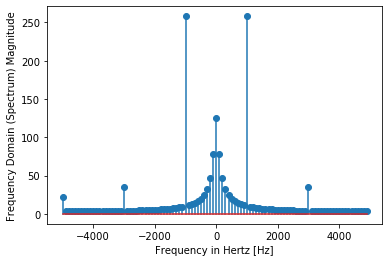

In [10]:
from scipy import fftpack
f_s = 1/inverter1.dt
X = fftpack.fft(sol[:,0])
freqs = fftpack.fftfreq(len(x)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
plt.show()

In [11]:
np.abs(X)

array([125.43397733,  78.59348222,  46.80337657,  32.50859111,
        24.77501061,  19.98975914,  16.75294812,  14.42433212,
        12.6718342 ,  11.30724517, 257.98715456,   9.32506884,
         8.58438372,   7.95967894,   7.42638709,   6.96645735,
         6.56604217,   6.21496452,   5.90501014,   5.62970477,
         5.38397577,   5.16371197,   4.96543545,   4.7863027 ,
         4.62401826,   4.47673675,   4.342662  ,   4.22041447,
         4.10876742,   4.00670946,  35.0913463 ,   3.82800168,
         3.74987126,   3.67841526,   3.61316396,   3.55364738,
         3.49936498,   3.45010765,   3.40555841,   3.36537099,
         3.32937686,   3.29739163,   3.26920658,   3.24462046,
         3.22357626,   3.2060021 ,   3.19169837,   3.18064043,
         3.1727889 ,   3.16810549,  21.82796615,   3.16810549,
         3.1727889 ,   3.18064043,   3.19169837,   3.2060021 ,
         3.22357626,   3.24462046,   3.26920658,   3.29739163,
         3.32937686,   3.36537099,   3.40555841,   3.45